In [ ]:
We will make the following assumptions for calculations:

The total population in urban areas is the number of urban households.
The total population in rural areas is the number of rural households.
Higher education includes Higher_Education and Graduate_Education.

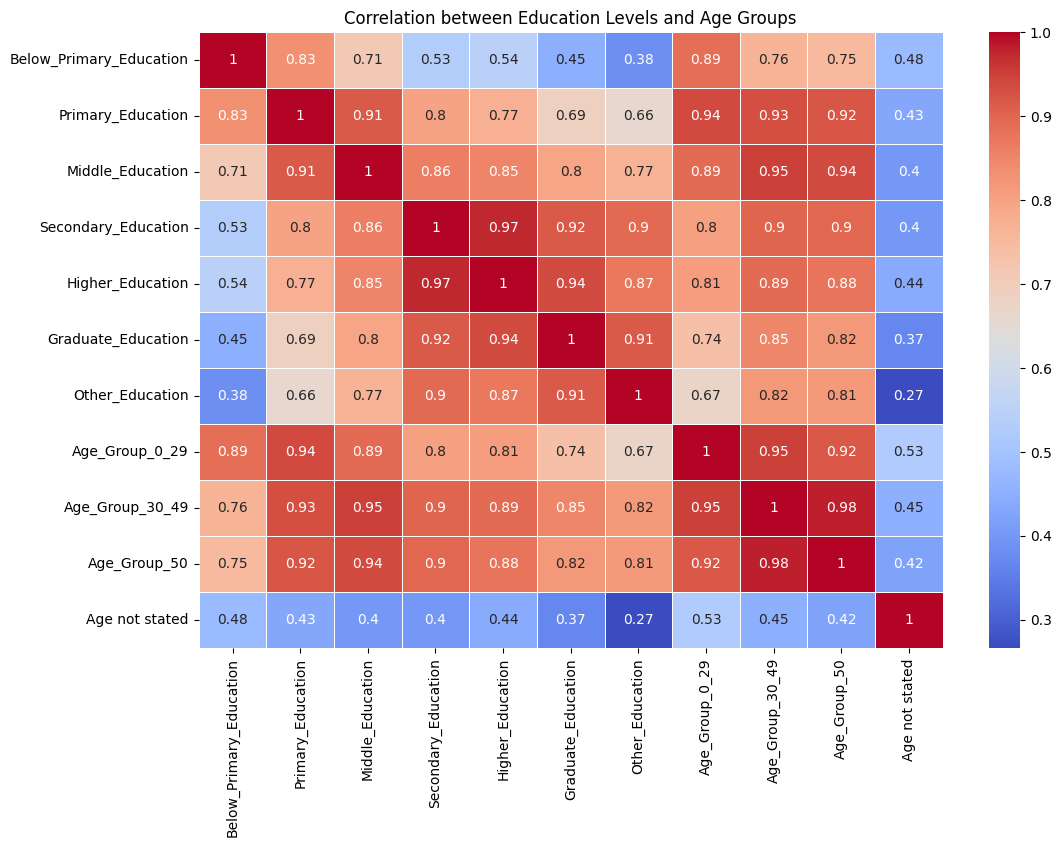

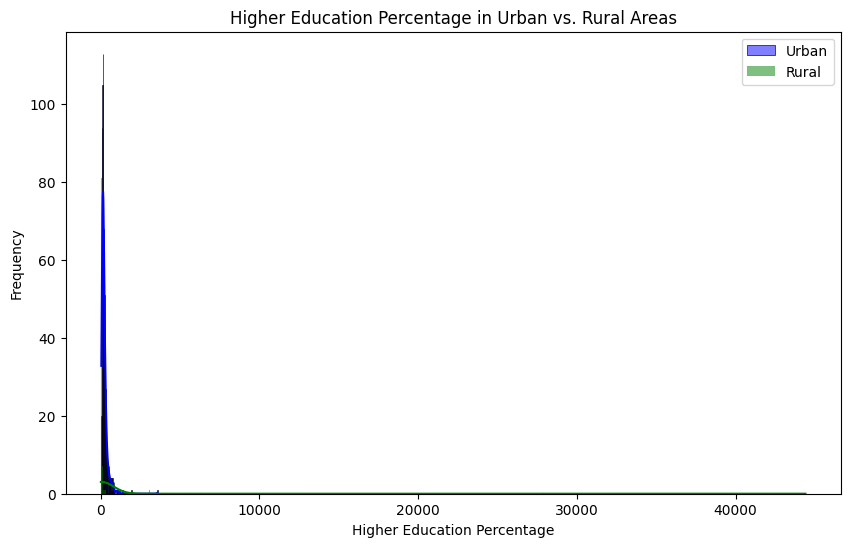

                 District name  Urban_Higher_Education_Percentage  \
0                      Kupwara                         264.617239   
1                       Badgam                         254.935638   
2                  Leh(Ladakh)                          86.528557   
3                       Kargil                         165.976331   
4                        Punch                         284.753422   
..                         ...                                ...   
635                       Mahe                          84.112304   
636                   Karaikal                         103.597805   
637                   Nicobars                                inf   
638  North  AND Middle Andaman                        1387.111517   
639              South Andaman                         103.292449   

     Rural_Higher_Education_Percentage  
0                            38.791199  
1                            43.148105  
2                            40.953413  
3      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'C:/Users/saim/Just_one_for_all/Desktop/india-districts-census-2011.csv'
census_data = pd.read_csv(file_path)

education_levels = [
    "Below_Primary_Education", "Primary_Education", "Middle_Education", 
    "Secondary_Education", "Higher_Education", "Graduate_Education", "Other_Education"
]
age_groups = [
    "Age_Group_0_29", "Age_Group_30_49", "Age_Group_50", "Age not stated"
]

# 3. Plot the correlation between education levels and age groups
correlation_matrix = census_data[education_levels + age_groups].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation between Education Levels and Age Groups')
plt.show()







# 4. Identify the percentage of the population that reaches higher education in urban and rural areas separately

# Calculate higher education percentages
# Assuming 'Higher_Education' and 'Graduate_Education' represent higher education levels
census_data['Total_Higher_Education'] = census_data['Higher_Education'] + census_data['Graduate_Education']

# Calculate urban and rural populations
total_urban_population = census_data['Urban_Households']
total_rural_population = census_data['Rural_Households']

# Calculate percentages
census_data['Urban_Higher_Education_Percentage'] = (
    census_data['Total_Higher_Education'] / total_urban_population * 100
)
census_data['Rural_Higher_Education_Percentage'] = (
    census_data['Total_Higher_Education'] / total_rural_population * 100
)

plt.figure(figsize=(10, 6))
sns.histplot(census_data['Urban_Higher_Education_Percentage'], color='blue', label='Urban', kde=True)
sns.histplot(census_data['Rural_Higher_Education_Percentage'], color='green', label='Rural', kde=True)
plt.title('Higher Education Percentage in Urban vs. Rural Areas')
plt.xlabel('Higher Education Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(census_data[['District name', 'Urban_Higher_Education_Percentage', 'Rural_Higher_Education_Percentage']])
